# Hw06: Parametric Methods
## Ekrem Yiğiter
### January 08, 2021

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import scipy.spatial as spa

## Parameters

In [2]:
np.random.seed(421)

N1 = 50
N2 = 50
N3 = 50
N4 = 50
N5 = 100

mean1 = np.array([2.5, 2.5])
mean2 = np.array([-2.5, 2.5])
mean3 = np.array([-2.5, -2.5])
mean4 = np.array([+2.5, -2.5])
mean5 = np.array([0, 0])

cov1 = np.array([[0.8, -0.6], [-0.6, 0.8]])
cov2 = np.array([[0.8, 0.6], [0.6, 0.8]])
cov3 = np.array([[0.8, -0.6], [-0.6, 0.8]])
cov4 = np.array([[0.8, 0.6], [0.6, 0.8]])
cov5 = np.array([[1.6, 0], [0, 1.6]])

sample_counter = np.array([N1, N2, N3, N4, N5])
sample_means = np.array([mean1, mean2, mean3, mean4, mean5])
sample_covariances = np.array([cov1, cov2, cov3, cov4, cov5])

## Data Generation

In [3]:
data1 = np.random.multivariate_normal(sample_means[0], sample_covariances[0], sample_counter[0])
data2 = np.random.multivariate_normal(sample_means[1], sample_covariances[1], sample_counter[1])
data3 = np.random.multivariate_normal(sample_means[2], sample_covariances[2], sample_counter[2])
data4 = np.random.multivariate_normal(sample_means[3], sample_covariances[3], sample_counter[3])
data5 = np.random.multivariate_normal(sample_means[4], sample_covariances[4], sample_counter[4])

X = np.vstack((data1, data2, data3, data4, data5))

## Plotting Data

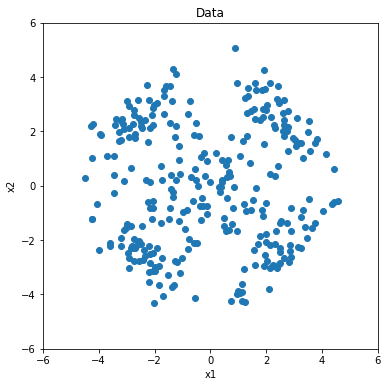

In [4]:
plt.figure(figsize = (6,6))
plt.scatter(X[:,0], X[:,1])
plt.axis([-6, 6, -6, 6])
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Algorithm Steps

In [5]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

## Visualization

In [6]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"])
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10, 
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

## Iterations

Iteration#1:


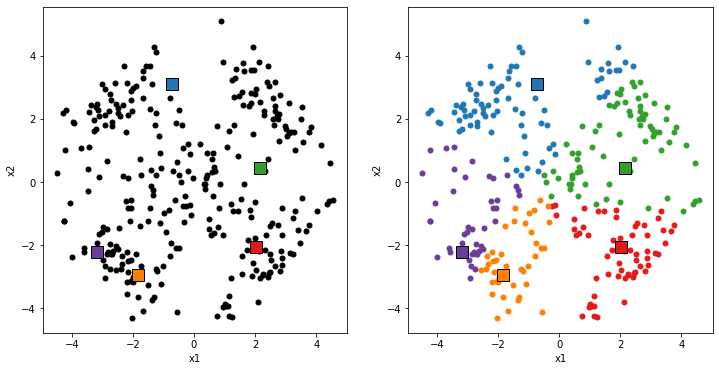

Iteration#2:


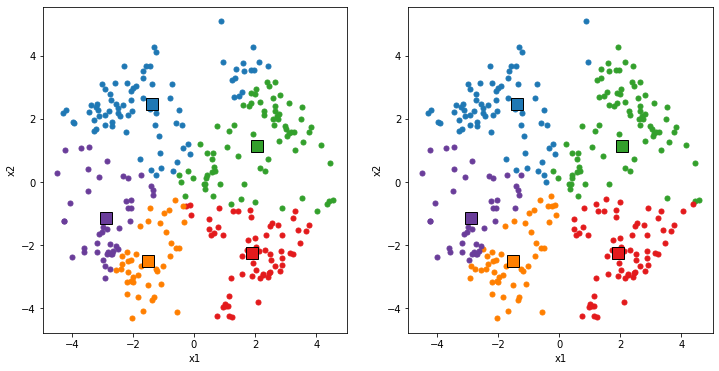

In [7]:
K = 5
N = 300
centroids = None
memberships = None
iteration = 1
for i in range(2):
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, X)
    if np.alltrue(centroids == old_centroids):
        break
    else:
        plt.figure(figsize = (12, 6))    
        plt.subplot(1, 2, 1)
        plot_current_state(centroids, memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_current_state(centroids, memberships, X)
        plt.show()

    iteration = iteration + 1

In [8]:
class_means = centroids
class_covariances = [(np.matmul(np.transpose(X[memberships == (c)] - class_means[c]), (X[memberships == (c)] - class_means[c])) / sample_counter[c]) for c in range(K)]
class_priors = [np.mean(memberships == (c)) for c in range(K)]

In [77]:
Gauss = np.zeros((N,5))

for k in range(100):
    for i in range(N):
        for j in range(K):
            Gauss[i,j]=(1/(2*m.pi*np.linalg.det(class_covariances[j])**0.5))*np.exp(-0.5 * np.transpose( X[i,:]-class_means[j,:]).dot(np.linalg.inv(class_covariances[j])).dot(X[i,:]-class_means[j,:]))
                
    for i in range(K):
        for j in range(K):
            n = np.sum(Gauss[:,i]) * class_priors[i]
        H = Gauss[:,i] * class_priors[i] / n
        class_means[i,] = np.sum(H.dot(X)) / np.sum(H)
        class_prior = np.sum(H)/N
        l = np.zeros((2,1))
        for j in range(N):
            l = H[j] * np.matmul(X[i,] - class_means[i,]),(np.transpose(X[i,] - class_means[i,]))
        class_covariances[0,] = np.sum(l[0,])/np.sum(H)
        class_covariances[1,] = np.sum(l[1,])/np.sum(H)
        

ValueError: invalid number of arguments